In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load and Explore Data



In [68]:
# Load Data
train_df = pd.read_csv("datasets/Airline Passanger Satisfaction/train.csv")
test_df = pd.read_csv("datasets/Airline Passanger Satisfaction/test.csv")

train_df["type"] = "train"
test_df["type"] = "test"

df = pd.concat([train_df, test_df], ignore_index=True).drop("Unnamed: 0", axis=1).set_index("id")

display(df.head())


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,type
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,train
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,train
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,train
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,train
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,train


In [69]:
# Check Data Shape
df.shape

(129880, 24)

In [70]:
# Check Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 70172 to 34799
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880

In [71]:
# Check Null Values
df.isnull().sum() / df.shape[0] * 100

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

In [72]:
# Check Data Description
display(df.describe())

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Check Data Distribution

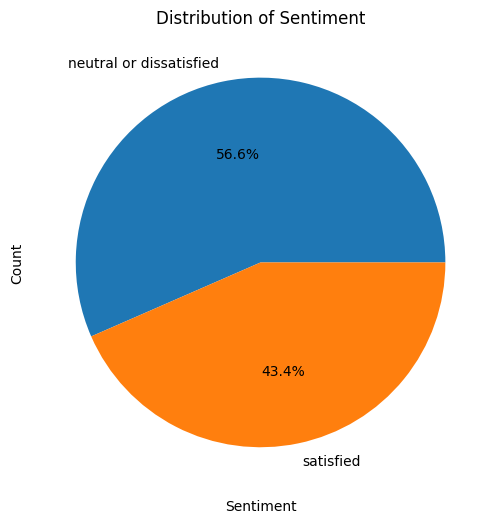

In [73]:
plt.figure(figsize=(10,6))
plt.pie(df["satisfaction"].value_counts(), labels=df["satisfaction"].value_counts().index, autopct="%1.1f%%")
plt.title("Distribution of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

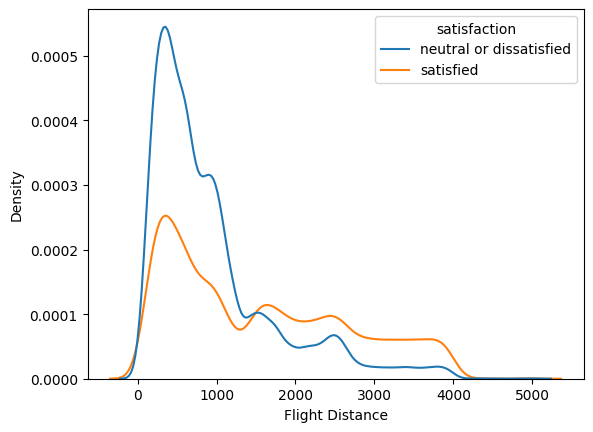

In [74]:
from seaborn import kdeplot

kdeplot(data=df, x='Flight Distance', hue='satisfaction')
plt.show()


## Data Preprocessing

In [75]:
df.dropna(inplace=True)
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
type                                 0
dtype: int64

In [76]:
# Encode Categorical Data
df['label'] = df['satisfaction'].apply(lambda x:1 if x == 'satisfied' else 0)

encode_cols = ["Gender", "Customer Type", "Type of Travel", "Class"]
df_encoded = pd.get_dummies(df[encode_cols], columns=encode_cols)
df_encoded = df_encoded.astype(int)

display(df_encoded.head())


,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,
70172,0,1,1,0,0,1,0,0,1
5047,0,1,0,1,1,0,1,0,0
110028,1,0,1,0,1,0,1,0,0
24026,1,0,1,0,1,0,1,0,0
119299,0,1,1,0,1,0,1,0,0


In [77]:
# Drop unnecesaary columns
dropped_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
df = df.drop(dropped_cols, axis=1)

### Model Training

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create train and test dataset
X_train = df[df['type'] == 'train']
X_train = X_train.drop(['type', 'label'], axis=1)
y_train = X_train['label']

# Create test dataset
X_test = df[df['type'] == 'test']
X_test = X_test.drop(['type', 'label'], axis=1)
y_test = X_test['label']

# Create model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

KeyError: 'label'